In [1]:
# import lsst.summit.extras

In [2]:
# lsst.summit.__file__

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from lsst.summit.extras.plotting.psfPlotting import makeAzElPlot, makeTableFromSourceCatalogs,makeFocalPlanePlot, makeEquatorialPlot, addColorbarToAxes
from atmospheric_dispersion_correction import addADC_to_Table
from lsst.obs.lsst import LsstComCam, LsstCam
import matplotlib.pyplot as plt
from ellipticity_util import addFieldCoords_to_Table, makeOCSPlot, read_batoid_table, addOpticalCoords_to_Table, MakeGridMedianPSF, makeTableFromCalexps, statistics_on_moments
# from lsst.ts.aos.analysis import StateFetcher #source .user_setups
from lsst.daf.butler import Butler
import numpy as np
from astropy.table import Table
from astropy.io import ascii

In [7]:
folder_ricardo = '~/image_quality_shared/imsim/ellipticitymap/Ricardo/'
visit_id_ricardo = 2025082600083

In [8]:
table_ric = Table.read(folder_ricardo+'lsst_seq'+str(visit_id_ricardo)+'.ecsv')

In [10]:
folderout = '/home/v/vittorio/image_quality_shared/imsim/ellipticitymap/figures/'
folderout_table = '/home/v/vittorio/image_quality_shared/imsim/ellipticitymap/tables/'

In [18]:
table_grid_ric = MakeGridMedianPSF(table_ric, 50, 50, 3)

In [23]:
# Statistics on moments

statistics = statistics_on_moments(table_ric)

ascii.write(statistics, folderout_table+'statistics'+str(visit_id)+'_ric.dat', overwrite=True)

# print('statistics on oc_Ixx: {:8.5f} {:8.5f} {:8.5f}'.format(oc_ixx_mean, oc_ixx_median, oc_ixx_std))
# print('statistics on oc_Iyy: {:8.5f} {:8.5f} {:8.5f}'.format(oc_iyy_mean, oc_iyy_median, oc_iyy_std))
# print('statistics on oc_Ixy: {:8.5f} {:8.5f} {:8.5f}'.format(oc_ixy_mean, oc_ixy_median, oc_ixy_std))
# print('statistics on oc_e1: {:8.5f} {:8.5f} {:8.5f}'.format(oc_e1_mean, oc_e1_median, oc_e1_std))
# print('statistics on oc_e2: {:8.5f} {:8.5f} {:8.5f}'.format(oc_e2_mean, oc_e2_median, oc_e2_std))
# print('statistics on aa_e: {:8.5f} {:8.5f} {:8.5f}'.format(aa_e_mean, aa_e_median, aa_e_std))
# print('statistics on e: {:8.5f} {:8.5f} {:8.5f}'.format(e_mean, e_median, e_std))
# print('statistics on T: {:8.5f} {:8.5f} {:8.5f}'.format(T_mean, T_median, T_std))

KeyError: 'base_CircularApertureFlux_6_0_instFlux'

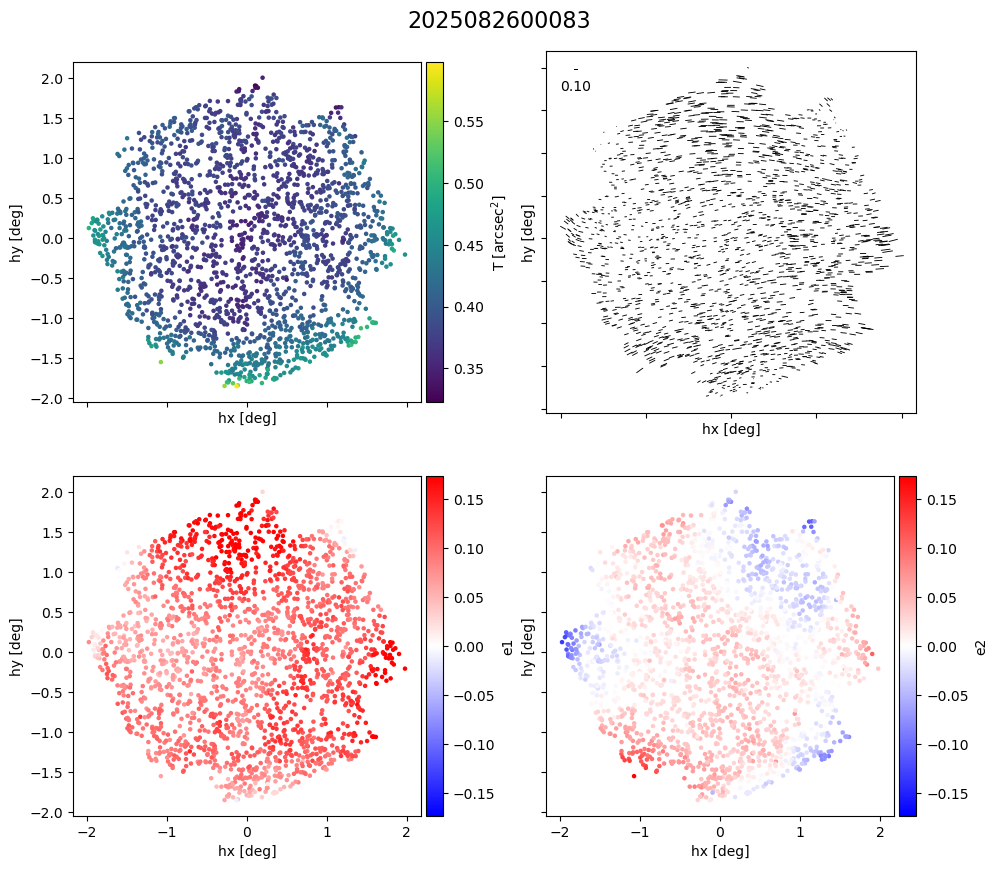

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 9), sharex=True, sharey=True)
fig.suptitle(visit_id, fontsize=16)
makeOCSPlot(fig, axes, table_ric, camera, autoscale=True, scale_quiver=.75, maxPoints=2000)
plt.show()
fig.savefig(folderout+'Ellipticitymap_OCS_'+suffix_out+'_'+str(visit_id)+'_ric.pdf')

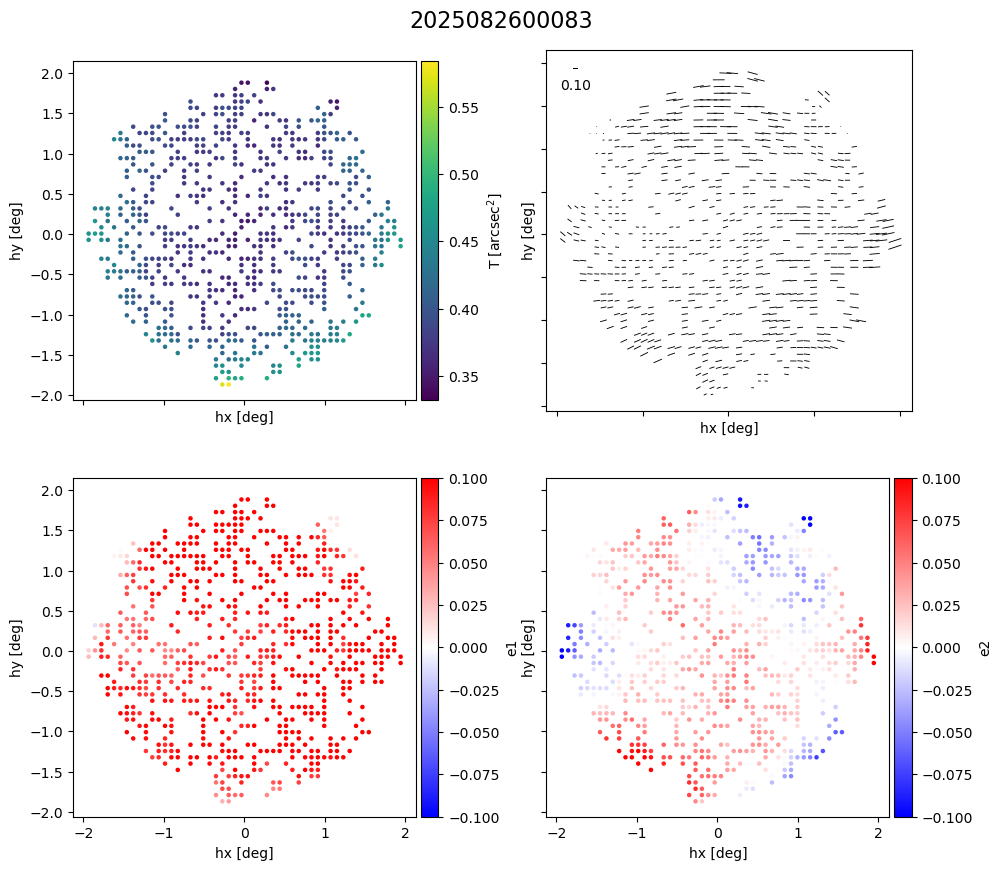

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 9), sharex=True, sharey=True)
fig.suptitle(visit_id, fontsize=16)
makeOCSPlot(fig, axes, table_grid_ric, camera)
plt.show()
fig.savefig(folderout+'Ellipticitymap_grid_OCS_'+suffix_out+'_'+str(visit_id)+'.pdf')

## Lettura Calexp

In [13]:
calexps = {}
psfs = {}
dets = {}
bkgds = {}
calexp_infos = {}
sourcess = {}
for i in range(n_det):
    try:
        dataId = {'visit': visit_id, 'detector': i}
        calexp = butler.get('calexp', **dataId)
        sources = butler.get('src', dataId)
        psf = calexp.getPsf()
        det = calexp.getDetector()
        bkgd = butler.get('calexpBackground', **dataId)
        calexp_infos.append(calexp.getInfo())

        calexps.append(calexp)
        psfs.append(psf)
        dets.append(det)
        bkgds.append(bkgd)
        sourcess.append(sources)

    except:
        continue
visitInfo = butler.get("postISRCCD.visitInfo", dataId={"exposure":visit_id, "detector":(n_det-1)})

DatasetNotFoundError: Dataset postISRCCD.visitInfo with data ID {instrument: 'LSSTCam', detector: 0, exposure: 7023071700215} could not be found in collections ('pipetask_output/20250611T110726Z',).

In [ ]:
makeTableFromCalexps(calexps, sourcess, psfs, elevation_angle, visitInfo)

In [14]:
table.columns

<TableColumns names=('id','coord_ra','coord_dec','parent','calib_psf_candidate','calib_psf_used','calib_psf_reserved','base_SdssCentroid_x','slot_Centroid_x','base_SdssCentroid_y','slot_Centroid_y','base_SdssCentroid_xErr','slot_Centroid_xErr','base_SdssCentroid_yErr','slot_Centroid_yErr','base_SdssCentroid_flag','base_CircularApertureFlux_flag_badCentroid','base_GaussianFlux_flag_badCentroid','base_PsfFlux_flag_badCentroid','ext_shapeHSM_HsmSourceMoments_flag_badCentroid','slot_Centroid_flag','base_SdssCentroid_flag_edge','base_CircularApertureFlux_flag_badCentroid_edge','base_GaussianFlux_flag_badCentroid_edge','base_PsfFlux_flag_badCentroid_edge','ext_shapeHSM_HsmSourceMoments_flag_badCentroid_edge','slot_Centroid_flag_edge','base_SdssCentroid_flag_noSecondDerivative','base_CircularApertureFlux_flag_badCentroid_noSecondDerivative','base_GaussianFlux_flag_badCentroid_noSecondDerivative','base_PsfFlux_flag_badCentroid_noSecondDerivative','ext_shapeHSM_HsmSourceMoments_flag_badCentroid

## alt/az in mm

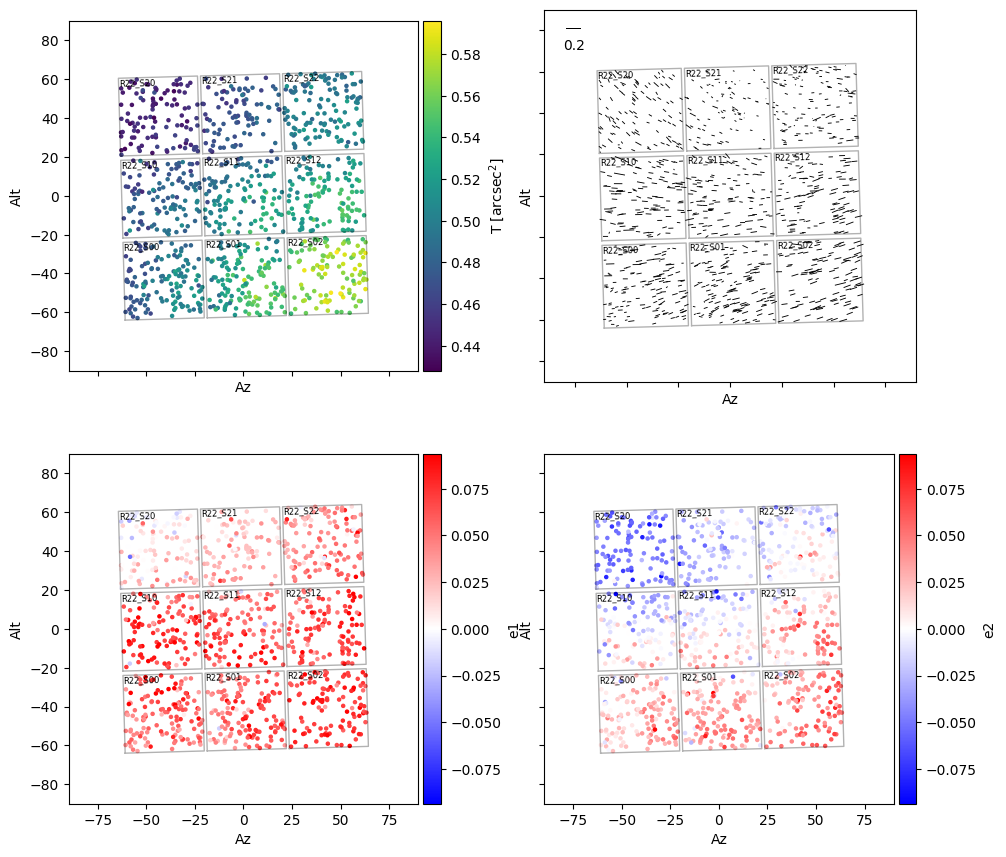

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 9), sharex=True, sharey=True)
makeAzElPlot(fig, axes, table, camera)
plt.show()

In [21]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 9), sharex=True, sharey=True)
# makeFocalPlanePlot(fig, axes, table, camera)
# plt.show()

In [22]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 9), sharex=True, sharey=True)
# makeEquatorialPlot(fig, axes, table, camera)
# plt.show()

#write output file

In [23]:
import numpy as np

In [22]:
from astropy.io import ascii

In [19]:
outname = 'prova.csv'
# outname = '/home/r/rzanmar/coords_seq%.8d.csv'%seqnum

In [24]:
outname

'prova.csv'

In [25]:
ascii.write(table[ 'oc_x','oc_y','oc_Ixx','oc_Iyy','oc_Ixy', ],outname, format='csv', fast_writer=False, overwrite=True)

In [26]:
table.meta['ocRot']

array([[ 0.99960987, -0.02793032],
       [-0.02793032, -0.99960987]])

# verify mm to field [deg] conversion

In [27]:
hx, hy = table['x'] * 0.2 / 36, table['y'] * 0.2 / 36      # 0.2 arcsec / pix * pix / 10um -> 0.2/36 deg/mm

In [28]:
hx_rot, hy_rot = table['oc_x'] * 0.2 / 36, table['oc_y'] * 0.2 / 36

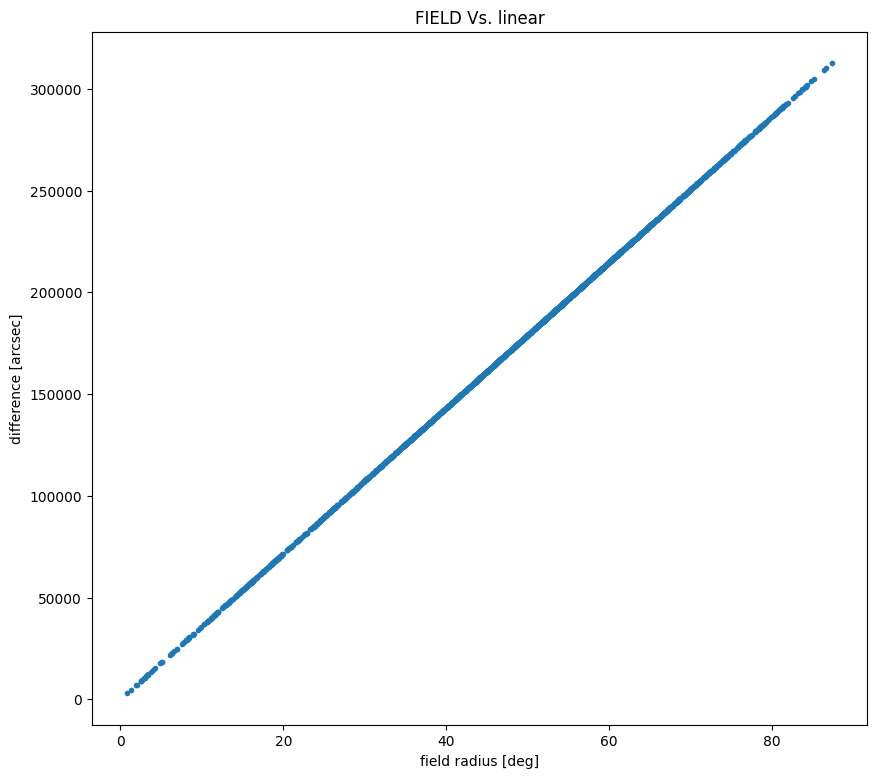

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 9), sharex=True, sharey=True)
plt.plot( np.sqrt( table['oc_x']**2+table['oc_y']**2), np.sqrt( (table['oc_x'] - hx_rot)**2 + (table['oc_y'] - hy_rot)**2)*3600, '.' )
axes.set_xlabel('field radius [deg]')
axes.set_ylabel('difference [arcsec]')
axes.set_title('FIELD Vs. linear')
plt.show()

In [30]:
table.meta['aaRot']

array([[ 0.99960987, -0.02793032],
       [ 0.02793032,  0.99960987]])

In [31]:
table.meta['ocRot']

array([[ 0.99960987, -0.02793032],
       [-0.02793032, -0.99960987]])